In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import models
from skimage.segmentation import quickshift

sys.path.append("../../src")
from explainer import Archipelago
from application_utils.image_utils import *
from application_utils.utils_torch import ModelWrapperTorch

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2
%matplotlib inline

device = torch.device("cuda:0")

## Get Model

In [2]:
model = models.resnet152(pretrained=True).to(device).eval();
model_wrapper = ModelWrapperTorch(model, device)

## Get Example

input image


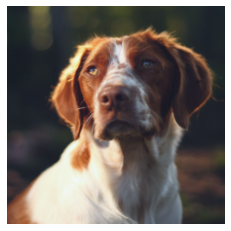

In [3]:
image_path = "dog.jpg"

image, labels = get_image_and_labels(image_path, device)

print("input image")
plt.imshow(image/2+0.5)
plt.axis("off")
plt.show()

## Get Classification

In [4]:
predictions = model_wrapper(np.expand_dims(image,0))
class_idx = predictions[0].argsort()[::-1][0]
print("classification:",labels[class_idx])

classification: Brittany spaniel


## Explain Prediction

In [5]:
baseline = np.zeros_like(image)
segments = quickshift(image, kernel_size=3, max_dist=300, ratio=0.2)

xf = ImageXformer(image, baseline, segments)
apgo = Archipelago(model_wrapper, data_xformer=xf, output_indices=class_idx, batch_size=20)

In [6]:
inter_effects, main_effects = apgo.explain(top_k=15, separate_effects=True)

### Plot Explanation

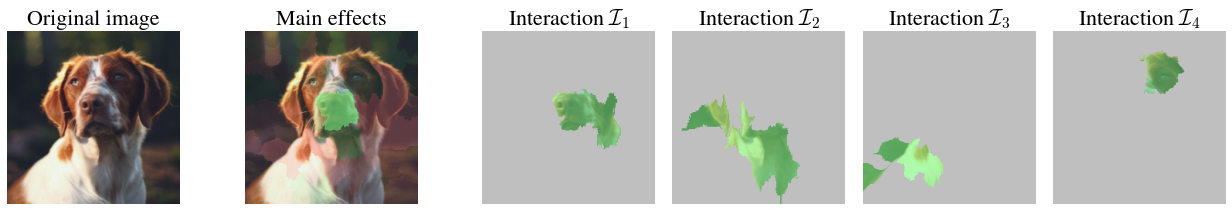

In [7]:
show_image_explanation(inter_effects.items(), image, segments, main_effects = main_effects.items() )